In [1]:
import numpy as np
import pandas as pd
import nbimporter
from Kuramoto_dynamicalModels import *
import statsmodels.api as sm
from statsmodels.tsa.api import VAR, DynamicVAR
from statsmodels.tsa.tsatools import detrend
import statsmodels
import matplotlib.pyplot as plt

Importing Jupyter notebook from Kuramoto_dynamicalModels.ipynb


In [2]:
def granger_casuality_table(df):
    num_cols = len(df.columns)
    colnames = df.columns.values
    
    df_results = pd.DataFrame(index=colnames, columns=colnames)
    df_results = df_results.fillna(0)
    model = VAR(df)
    #fit to VAR model with AIC

    VAR_results = model.fit(ic='aic',trend='nc')

    for row in colnames:
        for col in colnames:
            if not row == col:
                #determine casuality among different angles
                causal_results = VAR_results.test_causality(row, col, kind='Wald')
                causality_conclusion =causal_results.conclusion
                if causality_conclusion == 'reject':
                    df_results.loc[row,col]='GC'
                elif causality_conclusion == 'fail to reject':
                    df_results.loc[row,col]='not GC'
                    
    return df_results

# Strong Coupling

In [3]:
# these are our constants
N = 5  # number of variables
K = 10 #coupling
omega =  np.array([ 2.31246433, 35.50794494, 53.41350736, 50.23353682,  5.63392492])  # natural frequency
theta0 = np.array([117.35002435, 261.94283291, 260.06912657, 293.69995793,235.11319532]) # initial state 
sigma=2
tinit = 0.0
tmax = 10.0
dt =  0.01

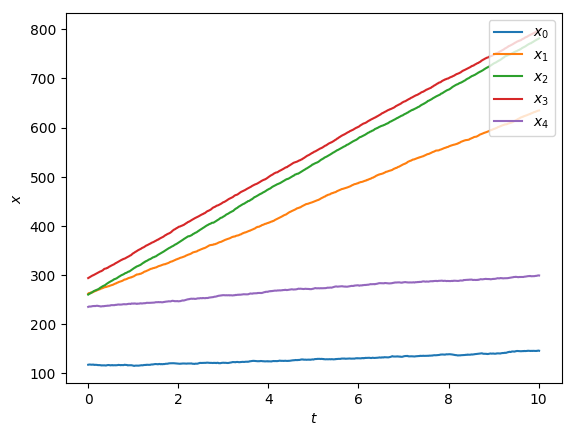

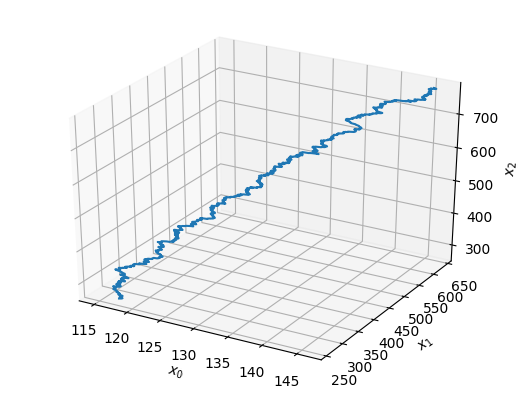

In [4]:
kuramoto = Kuramoto(N,K,omega,sigma)
sol = kuramoto.integrate(tinit, tmax, dt, theta0)
kuramoto.evolution_plot()
kuramoto.trajectory_plot()

In [5]:
kuramoto_df = pd.DataFrame(data= sol[1],    
                columns=['x0','x1','x2','x3','x4'])
kuramoto_transform_df = kuramoto_df.transform([np.cos,np.sin])
kuramoto_transform_df.columns = [''.join(col).strip() for col in kuramoto_transform_df.columns.values]

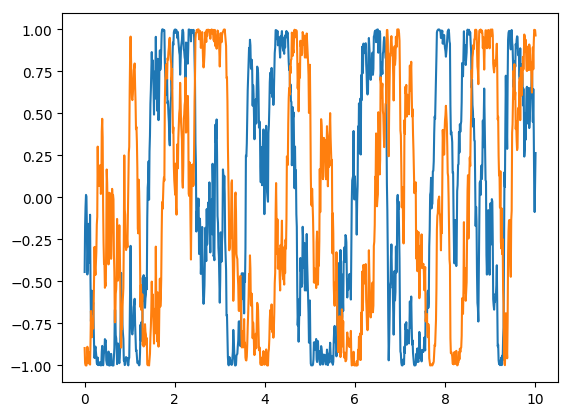

In [6]:
plt.cla()
plt.plot(sol[0],kuramoto_transform_df['x0cos'])
plt.plot(sol[0],kuramoto_transform_df['x0sin'])

plt.show()

In [7]:
granger_casuality_table(kuramoto_transform_df)

,x0cos,x0sin,x1cos,x1sin,x2cos,x2sin,x3cos,x3sin,x4cos,x4sin
x0cos,0,GC,GC,not GC,not GC,not GC,not GC,not GC,not GC,not GC
x0sin,GC,0,not GC,not GC,not GC,GC,not GC,not GC,not GC,GC
x1cos,not GC,not GC,0,GC,not GC,not GC,not GC,not GC,not GC,not GC
x1sin,not GC,not GC,GC,0,not GC,not GC,not GC,GC,GC,GC
x2cos,not GC,not GC,not GC,not GC,0,GC,not GC,not GC,not GC,not GC
x2sin,not GC,not GC,not GC,GC,GC,0,not GC,not GC,not GC,not GC
x3cos,not GC,not GC,GC,not GC,GC,not GC,0,GC,GC,not GC
x3sin,not GC,GC,not GC,not GC,not GC,not GC,GC,0,not GC,not GC
x4cos,not GC,not GC,not GC,not GC,not GC,not GC,not GC,not GC,0,GC
x4sin,GC,not GC,not GC,not GC,not GC,not GC,not GC,GC,GC,0


# Weak Coupling

In [8]:
# these are our constants
N = 5  # number of variables
K = 0.01 #coupling
omega =  np.array([ 2.31246433, 35.50794494, 53.41350736, 50.23353682,  5.63392492])  # natural frequency
theta0 = np.array([117.35002435, 261.94283291, 260.06912657, 293.69995793,235.11319532]) # initial state 
sigma=2
tinit = 0.0
tmax = 10.0
dt =  0.01

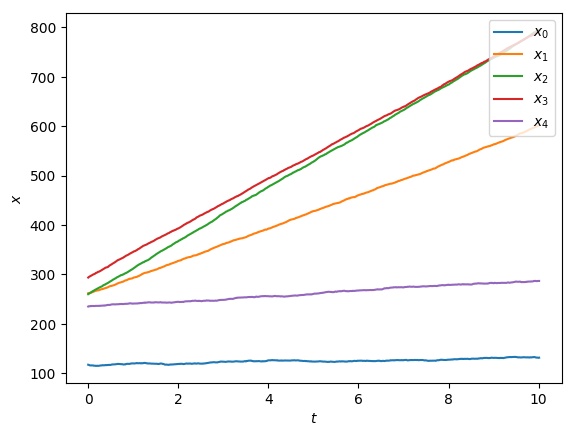

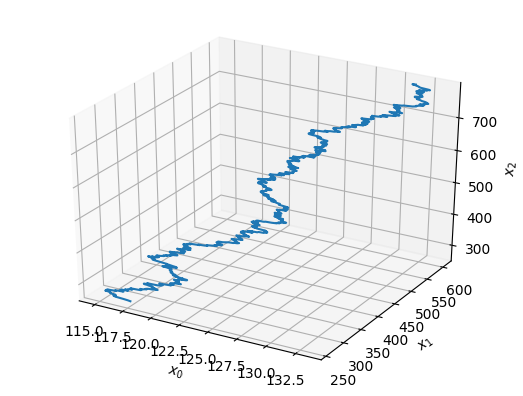

In [9]:
kuramoto = Kuramoto(N,K,omega,sigma)
sol = kuramoto.integrate(tinit, tmax, dt, theta0)
kuramoto.evolution_plot()
kuramoto.trajectory_plot()

In [10]:
kuramoto_df = pd.DataFrame(data= sol[1],    
                columns=['x0','x1','x2','x3','x4'])
kuramoto_transform_df = kuramoto_df.transform([np.cos,np.sin])
kuramoto_transform_df.columns = [''.join(col).strip() for col in kuramoto_transform_df.columns.values]

In [11]:
granger_casuality_table(kuramoto_transform_df)

,x0cos,x0sin,x1cos,x1sin,x2cos,x2sin,x3cos,x3sin,x4cos,x4sin
x0cos,0,GC,not GC,not GC,not GC,not GC,not GC,GC,not GC,not GC
x0sin,GC,0,not GC,not GC,not GC,not GC,not GC,not GC,not GC,not GC
x1cos,not GC,not GC,0,GC,not GC,not GC,not GC,not GC,not GC,not GC
x1sin,not GC,not GC,GC,0,not GC,not GC,not GC,not GC,not GC,not GC
x2cos,not GC,not GC,not GC,not GC,0,GC,GC,not GC,not GC,not GC
x2sin,GC,not GC,not GC,not GC,GC,0,not GC,not GC,not GC,not GC
x3cos,not GC,not GC,not GC,not GC,not GC,not GC,0,GC,not GC,not GC
x3sin,not GC,not GC,not GC,not GC,not GC,not GC,GC,0,not GC,not GC
x4cos,not GC,not GC,not GC,not GC,not GC,not GC,not GC,not GC,0,GC
x4sin,not GC,not GC,not GC,not GC,not GC,not GC,not GC,not GC,GC,0


# No Coupling

In [12]:
# these are our constants
N = 5  # number of variables
K = 0.0 #coupling
omega =  np.array([ 2.31246433, 35.50794494, 53.41350736, 50.23353682,  5.63392492])  # natural frequency
theta0 = np.array([117.35002435, 261.94283291, 260.06912657, 293.69995793,235.11319532]) # initial state 
sigma=2
tinit = 0.0
tmax = 10.0
dt =  0.01

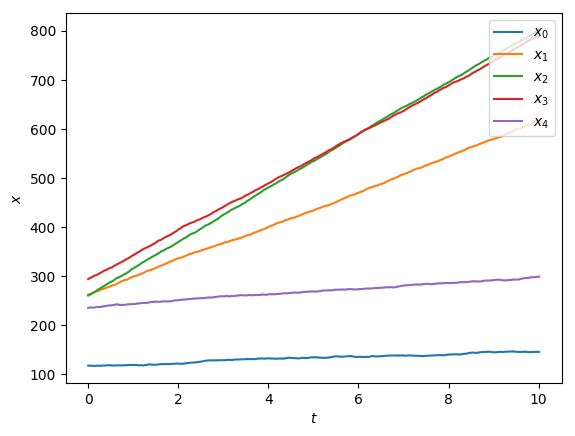

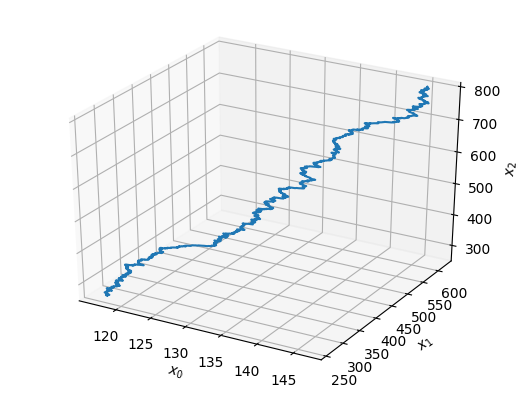

In [13]:
kuramoto = Kuramoto(N,K,omega,sigma)
sol = kuramoto.integrate(tinit, tmax, dt, theta0)
kuramoto.evolution_plot()
kuramoto.trajectory_plot()

In [14]:
kuramoto_df = pd.DataFrame(data= sol[1],    
                columns=['x0','x1','x2','x3','x4'])
kuramoto_transform_df = kuramoto_df.transform([np.cos,np.sin])
kuramoto_transform_df.columns = [''.join(col).strip() for col in kuramoto_transform_df.columns.values]

In [15]:
granger_casuality_table(kuramoto_transform_df)

,x0cos,x0sin,x1cos,x1sin,x2cos,x2sin,x3cos,x3sin,x4cos,x4sin
x0cos,0,GC,not GC,not GC,not GC,not GC,not GC,not GC,not GC,not GC
x0sin,GC,0,not GC,not GC,not GC,not GC,not GC,not GC,not GC,not GC
x1cos,not GC,not GC,0,GC,GC,not GC,not GC,not GC,not GC,not GC
x1sin,not GC,not GC,GC,0,not GC,not GC,not GC,not GC,not GC,not GC
x2cos,not GC,not GC,not GC,not GC,0,GC,not GC,not GC,not GC,not GC
x2sin,not GC,not GC,not GC,not GC,GC,0,not GC,not GC,not GC,not GC
x3cos,not GC,not GC,not GC,not GC,not GC,not GC,0,GC,not GC,not GC
x3sin,not GC,not GC,not GC,not GC,not GC,not GC,GC,0,not GC,not GC
x4cos,not GC,not GC,not GC,not GC,not GC,not GC,not GC,not GC,0,GC
x4sin,not GC,not GC,not GC,not GC,not GC,not GC,not GC,not GC,GC,0


# No Coupling, High Variance

In [16]:
# these are our constants
N = 5  # number of variables
K = 0.0 #coupling
omega =  np.array([ 2.31246433, 35.50794494, 53.41350736, 50.23353682,  5.63392492])  # natural frequency
theta0 = np.array([117.35002435, 261.94283291, 260.06912657, 293.69995793,235.11319532]) # initial state 
sigma=10
tinit = 0.0
tmax = 10.0
dt =  0.01

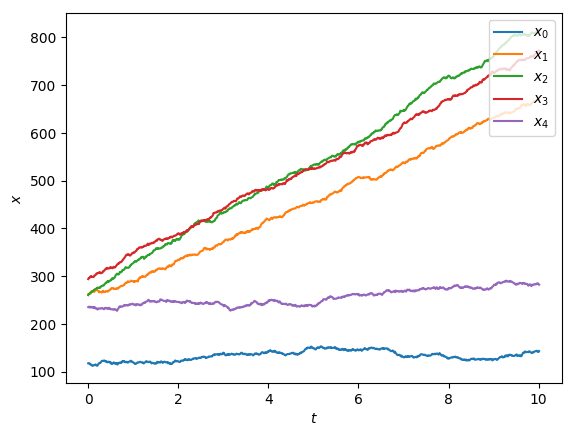

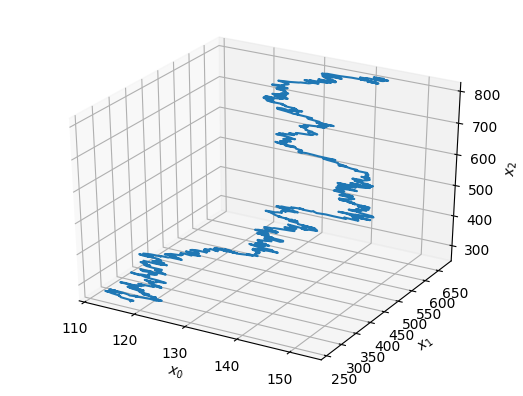

In [17]:
kuramoto = Kuramoto(N,K,omega,sigma)
sol = kuramoto.integrate(tinit, tmax, dt, theta0)
kuramoto.evolution_plot()
kuramoto.trajectory_plot()

In [18]:
kuramoto_df = pd.DataFrame(data= sol[1],    
                columns=['x0','x1','x2','x3','x4'])
kuramoto_transform_df = kuramoto_df.transform([np.cos,np.sin])
kuramoto_transform_df.columns = [''.join(col).strip() for col in kuramoto_transform_df.columns.values]

In [19]:
granger_casuality_table(kuramoto_transform_df)

,x0cos,x0sin,x1cos,x1sin,x2cos,x2sin,x3cos,x3sin,x4cos,x4sin
x0cos,0,not GC,not GC,not GC,not GC,not GC,not GC,not GC,not GC,not GC
x0sin,not GC,0,not GC,not GC,not GC,not GC,not GC,not GC,not GC,not GC
x1cos,not GC,not GC,0,GC,not GC,not GC,GC,not GC,not GC,not GC
x1sin,not GC,not GC,GC,0,not GC,not GC,not GC,not GC,not GC,not GC
x2cos,not GC,GC,not GC,not GC,0,GC,not GC,not GC,not GC,not GC
x2sin,not GC,not GC,not GC,not GC,GC,0,not GC,GC,not GC,not GC
x3cos,not GC,not GC,not GC,not GC,not GC,not GC,0,GC,not GC,not GC
x3sin,not GC,not GC,not GC,not GC,not GC,not GC,GC,0,not GC,not GC
x4cos,not GC,not GC,not GC,not GC,not GC,not GC,not GC,not GC,0,not GC
x4sin,not GC,not GC,not GC,not GC,not GC,GC,not GC,not GC,not GC,0
